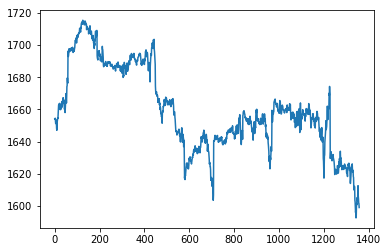

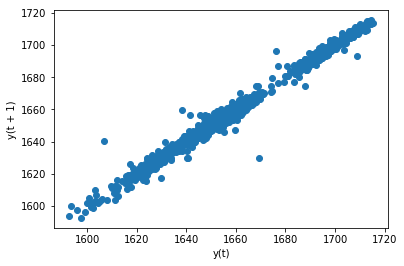

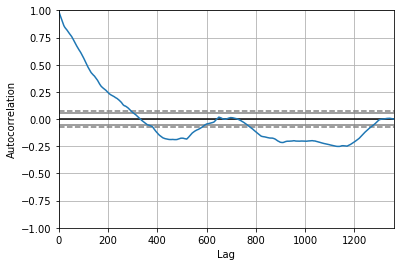

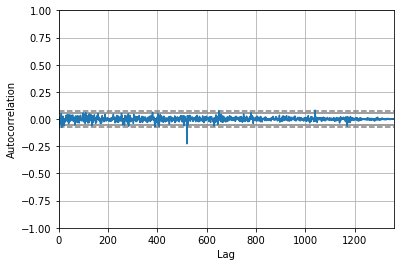

In [1]:
# https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as pdr
from pandas.plotting import lag_plot

from pandas.plotting import autocorrelation_plot

import statsmodels
import statsmodels.api as sm


df_amzn = pandas.read_excel('amzn.xlsx')

close_amzn = df_amzn['Close']


plt.plot(close_amzn)
plt.show()

lag_plot(close_amzn)
plt.show()

autocorrelation_plot(close_amzn)
plt.show()

autocorrelation_plot(np.diff(np.log(close_amzn)))
plt.show()


Lag: 1
Coefficients: [9.47043989 0.99431031]


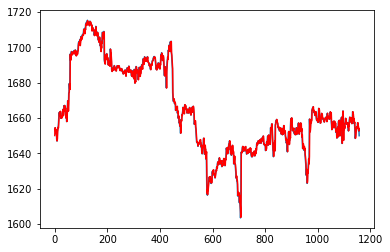

In [49]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# train autoregression
# split dataset
X = close_amzn.values
train, test = X[1:len(X)-200], X[len(X)-200:]

model = AR(train)
model_fit = model.fit(maxlag=1)
window = model_fit.k_ar

coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
fittedvalues = list()
for t in range(len(train)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = train[t]
    fittedvalues.append(yhat)
    history.append(obs)
    
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

plt.plot(train)
plt.plot(fittedvalues, color='red')
plt.show()

Lag: 1
Coefficients: const       9.47044
L1.Close    0.99431
dtype: float64
Test MSE: 1016.788


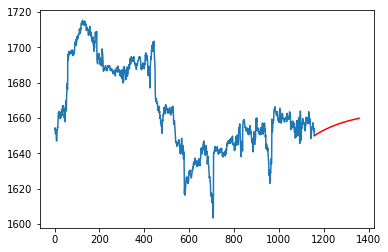

In [48]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# split dataset
X = close_amzn
train, test = X[1:len(X)-200], X[len(X)-200:]
# train autoregression
model = AR(train)
model_fit = model.fit(maxlag=1)
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start= len(train), end=len(train)+len(test)-1, dynamic=True)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(train)
plt.plot(predictions, color='red')
plt.show()